## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [ ]:
/Users/oakmoreroadinc./Desktop/Data Science /3.Data Analysis/Capstone Project.How to do the job./m1_survey_data (1).csv

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


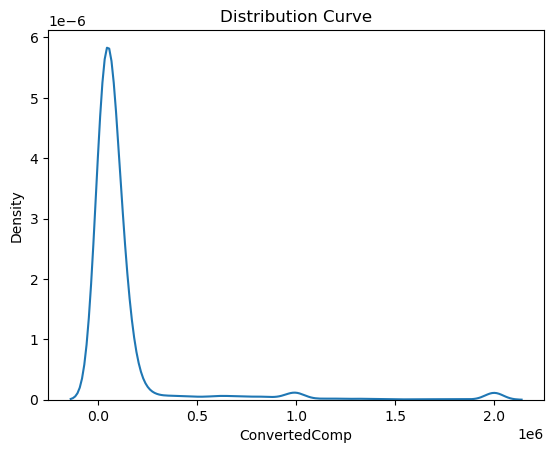

In [3]:
# Plot distribution curve
import seaborn as sns
import matplotlib.pyplot as plt


sns.kdeplot(df['ConvertedComp'])
plt.title('Distribution Curve')
plt.show()


Plot the histogram for the column `ConvertedComp`.


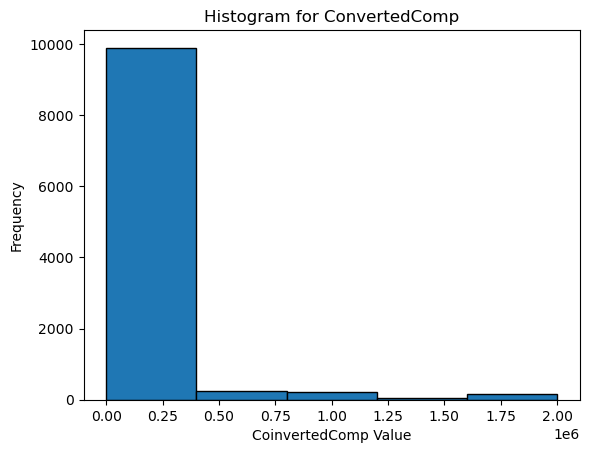

In [4]:
# Plot histogram
plt.hist(df['ConvertedComp'], bins=5, edgecolor='black')
plt.title('Histogram for ConvertedComp')
plt.xlabel('CoinvertedComp Value')
plt.ylabel('Frequency')
plt.show()


What is the median of the column `ConvertedComp`?


In [5]:
# Calculate median
ConvertedComp_median_value = df['ConvertedComp'].median()
print(f"The median of ConvertedComp column is {ConvertedComp_median_value}")



The median of ConvertedComp column is 57745.0


How many responders identified themselves only as a **Man**?


In [6]:
# Count occurrences
count = len(df[df['Gender'] == 'Man'])
print(f"Total count: {count}")


Total count: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [7]:
ConvertedComp_median_value = df[df['Gender'] == 'Woman']['ConvertedComp'].median()
print(f"The median ConvertedComp of responders only as Women is {ConvertedComp_median_value}")



The median ConvertedComp of responders only as Women is 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [8]:
summary = df['Age'].describe()
min_val = summary['min']
q1 = summary['25%']
median = summary['50%']
q3 = summary['75%']
max_val = summary['max']

print(f"Five-number summary for Age:")
print(f"Min: {min_val}")
print(f"Q1: {q1}")
print(f"Median: {median}")
print(f"Q3: {q3}")
print(f"Max: {max_val}")



Five-number summary for Age:
Min: 16.0
Q1: 25.0
Median: 29.0
Q3: 35.0
Max: 99.0


Plot a histogram of the column `Age`.


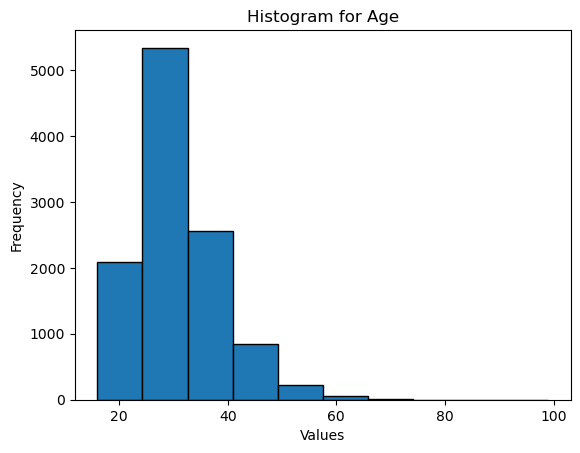

In [9]:
# Plot a histogram of the column Age. 
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Histogram for Age')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


0

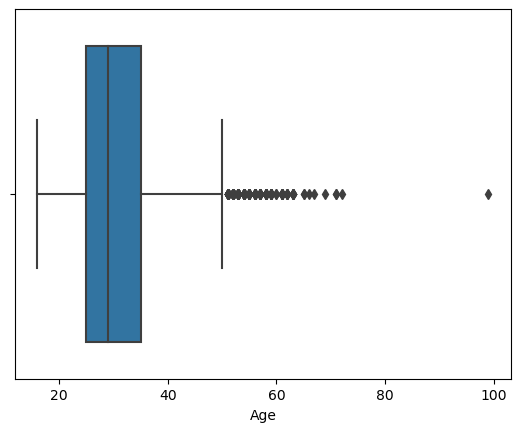

In [10]:
#boxplot of 'Age'
sns.boxplot(x=df['Age'])
Q1 = df['Age'].quantile(0.25)
IQR = df['Age'].quantile(0.75) - Q1
lower_bound = Q1 - 1.5 * IQR
outliers_below_Q1 = len(df[df['Age'] < lower_bound])
outliers_below_Q1


<Axes: xlabel='ConvertedComp'>

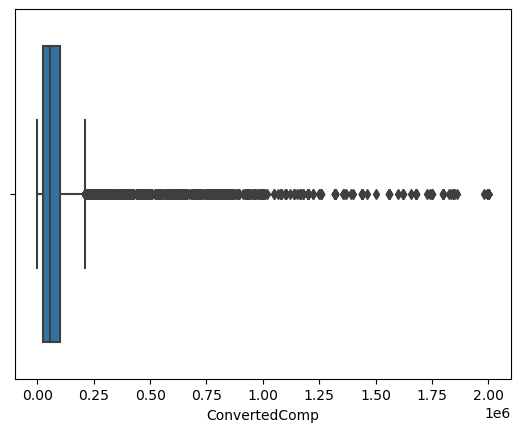

In [11]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [12]:
# Quartile Range
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

73132.0


Find out the upper and lower bounds.


In [13]:
#Upper&Lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-82830.0
209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [14]:
# Count outliers
outliers_count = len(df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)])
print(f"There are {outliers_count} outliers in the ConvertedComp coloumn")
print(df.shape)

There are 879 outliers in the ConvertedComp coloumn
(11398, 85)


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [15]:
# Create new DataFrame without outliers in ConvertedComp
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
df_no_outliers.shape


(9703, 85)

In [16]:
#ConvertedComp Median after removing outliers
ConvertedComp_median_outliers_remove = df_no_outliers['ConvertedComp'].median()
print(f"The median of ConvertedComp column after removal of outliers is {ConvertedComp_median_outliers_remove}")


The median of ConvertedComp column after removal of outliers is 52704.0


In [17]:
#ConvertedComp Mean after removing outliers
ConvertedComp_mean_outliers_remove = df_no_outliers['ConvertedComp'].mean()
print(f"The mean of ConvertedComp column after removal of outliers is {ConvertedComp_mean_outliers_remove}")

The mean of ConvertedComp column after removal of outliers is 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [18]:
# Correlation between all numerical coloumns
correlations = df_no_outliers.corr()
print(correlations) 

               Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.019354       0.010878    -0.016221    0.005293   
CompTotal       -0.019354   1.000000      -0.063561     0.004910    0.017007   
ConvertedComp    0.010878  -0.063561       1.000000     0.034351   -0.088934   
WorkWeekHrs     -0.016221   0.004910       0.034351     1.000000    0.038935   
CodeRevHrs       0.005293   0.017007      -0.088934     0.038935    1.000000   
Age              0.002180   0.006337       0.401821     0.032032   -0.012878   

                    Age  
Respondent     0.002180  
CompTotal      0.006337  
ConvertedComp  0.401821  
WorkWeekHrs    0.032032  
CodeRevHrs    -0.012878  
Age            1.000000  


/var/folders/zx/f1n4qhss7qq5b_ypxdtf1xr00000gn/T/ipykernel_3326/3840079083.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_no_outliers.corr()


In [22]:
#saving new df to csv file
    
df_no_outliers.to_csv('Updated_survey_data.csv', index=False)